In [258]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from scipy import stats
from sklearn import tree

In [259]:
df = pd.read_csv('mpg.csv')

In [260]:
df = df.replace('?', np.nan)
df = df.dropna()
df.horsepower = df.horsepower.map(int)

In [261]:
df = df.drop(['name','origin','model_year'], axis=1)

In [262]:
X=df.iloc[:,1:6]

In [263]:
y=df.iloc[:,0]

In [248]:
X = X.astype({"horsepower":int})
X.dtypes

cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
dtype: object

In [249]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6
394,44.0,4,97.0,52,2130,24.6
395,32.0,4,135.0,84,2295,11.6
396,28.0,4,120.0,79,2625,18.6


In [264]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [265]:
corr = df.corr()
corr.shape

(6, 6)

<AxesSubplot:>

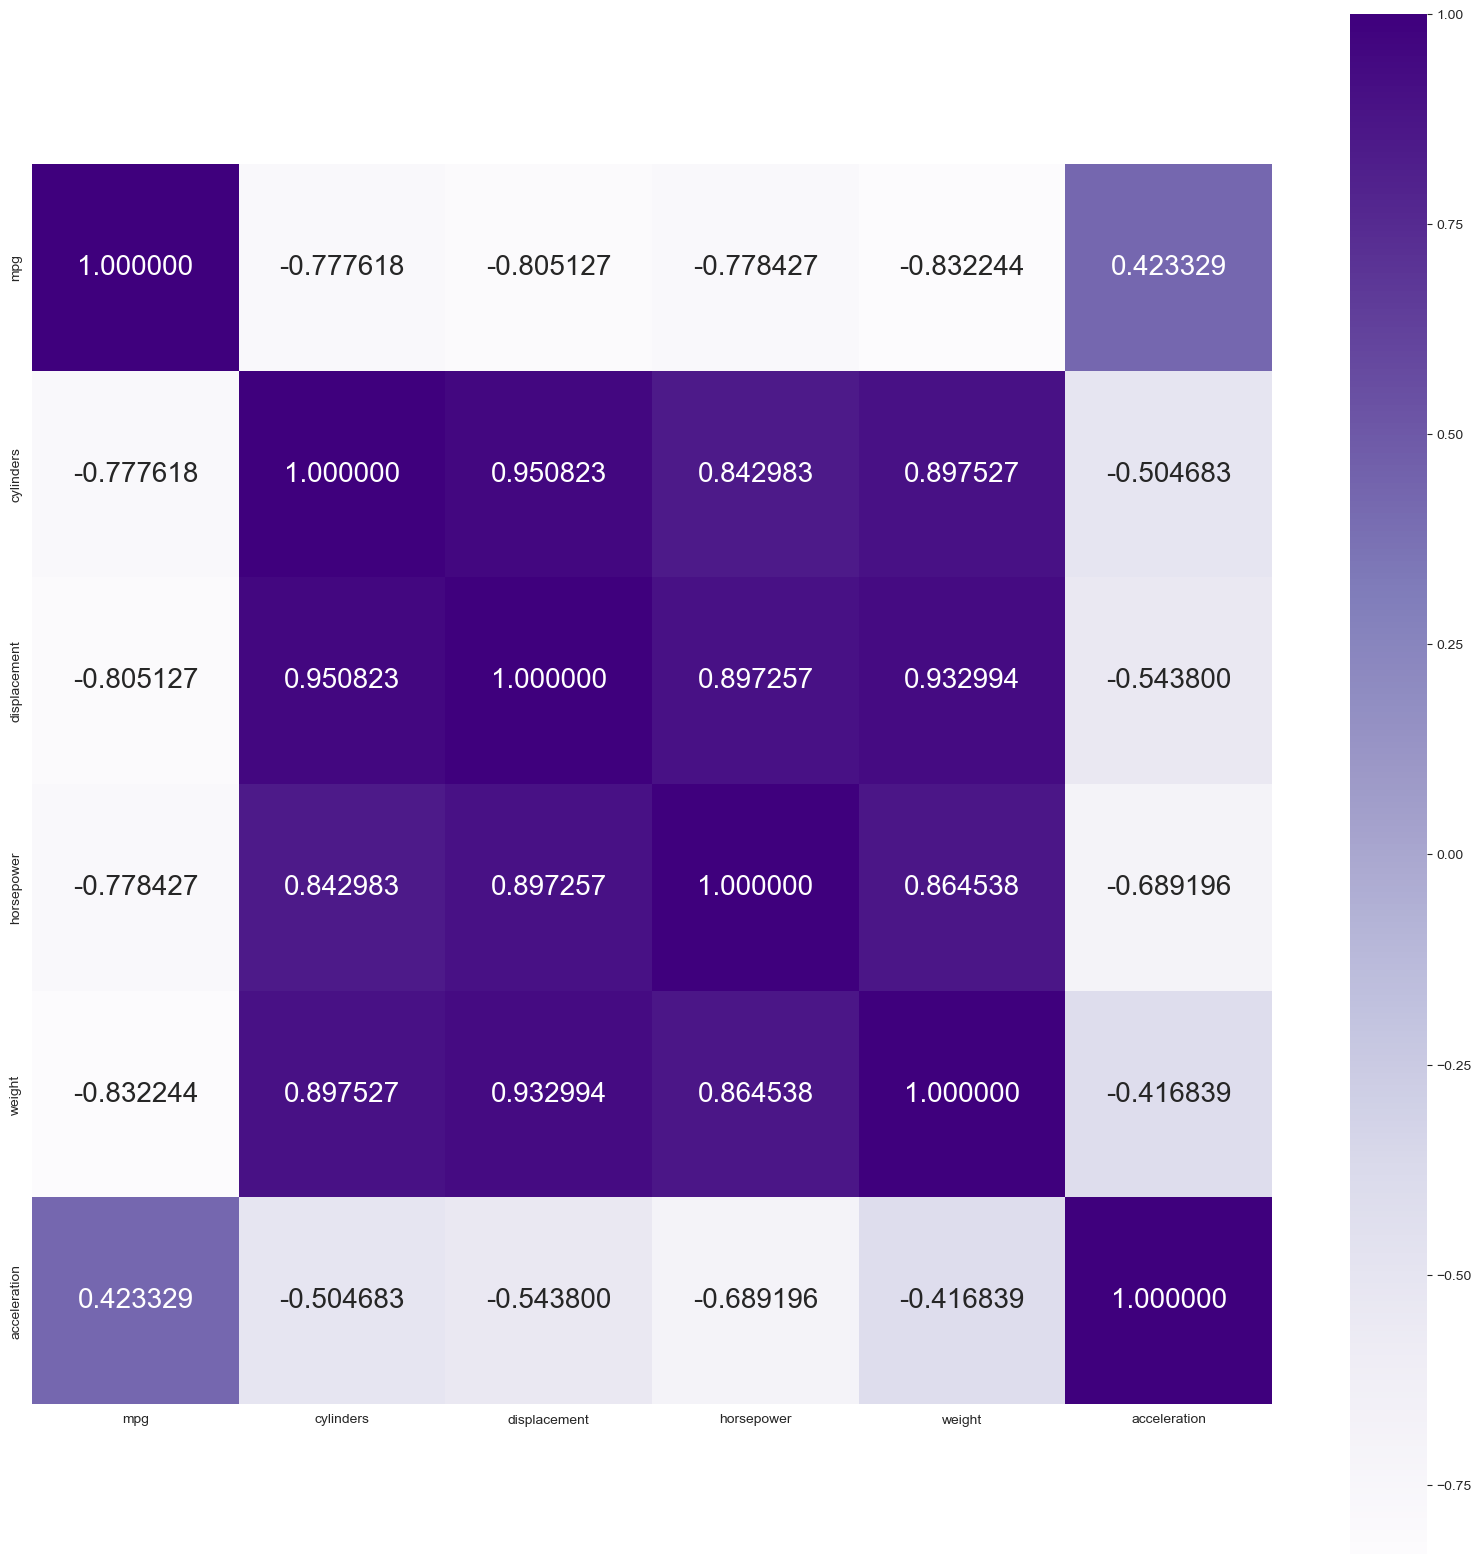

In [268]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True, square= True, fmt='f', annot=True, annot_kws={'size':20}, cmap='Purples')

In [269]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

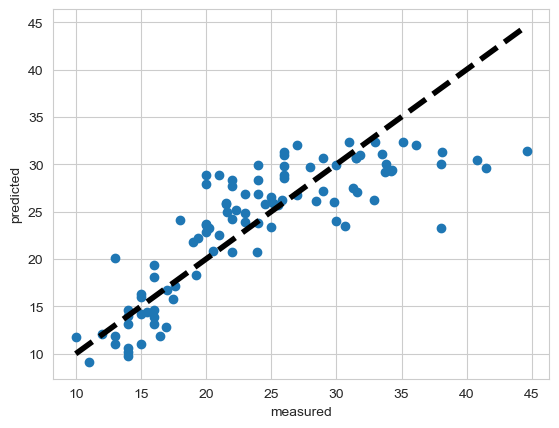

In [254]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [270]:
print("y prediction=\n",y_pred)
print("______________________________")
print("coefficent:\n",regressor.coef_)
print("______________________________")
print( "Interception:\n", regressor.intercept_)
print("______________________________")
cutoff = 27.3 # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1   
y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test > cutoff] = 1
cm=confusion_matrix(y_pred_classes,y_test_classes)
ac=accuracy_score(y_pred_classes,y_test_classes)*100
pr=precision_score(y_test_classes,y_pred_classes,average='macro')*100
print("Confusion Matric:\n",cm)
print("______________________________")
print("Accuracy Score:\n",ac,"%")
print("______________________________")
print("Precision score:\n",pr,"%")
print("______________________________")
print("R2 Score:\n",r2_score(y_test_classes, y_pred_classes))


y prediction=
 [29.72707092 25.14951072 12.05700087 29.9903163  30.07748758 22.26586978
 31.34215851 24.0519931  22.83328249 28.8622851  32.06054939 11.83442783
 25.82129017  9.13978401 12.83221792 29.16976431 24.91975953 14.60509096
 28.59995449 26.15485644 20.08861352 19.3485922  27.93520139 23.37496559
 29.57419573 13.16761461 26.22557681 25.93509216 23.53885591 16.70570848
 23.70316883 27.10268369 27.70554137 30.96560653 22.50808923 25.96810815
 32.38723878 11.92162701 13.90058867 10.18048108 15.97644415 31.39616056
 27.52526128 14.59163745 30.63623556 13.0921521  27.18952162 11.06054257
 15.76544938 24.14847974 28.89645148 16.28590101 11.7628965  28.37138985
 29.37163306 23.51489817 23.28942087 20.77707425 32.36853834 28.88891893
 24.23800783 29.90150553 30.61528992 11.03271301 29.7862996  18.09563125
 10.57027064 26.76626561 26.53682402 30.4767784  32.06701041 29.87024768
 17.13143407 14.36541703 23.88626284 14.00285348 31.2767956  18.33414723
 30.63875382 31.06211439 20.81933213

In [271]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(solver='lbfgs', max_iter=10000000)
cutoff = 27.3                             
y_train_logr = np.zeros_like(y_train)
y_train_logr[y_train > cutoff] = 1   
logr=LogisticRegression()
logr.fit(X_train,y_train_logr)
y_predlogr=logr.predict(X_test)

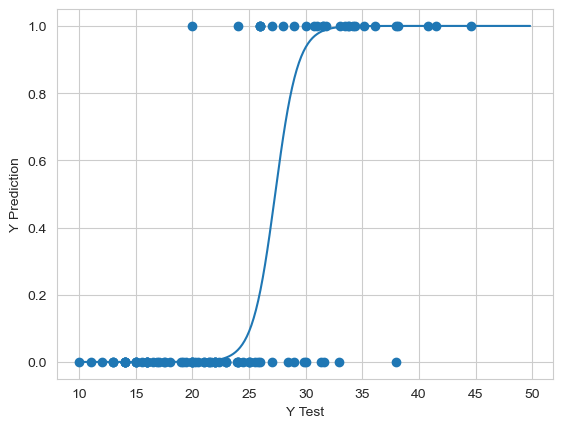

LogisticRegression()

In [273]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predlogr)
vals = np.arange(10,50,0.2)
gz= 1/(1+np.e**(27.3-vals))
plt.plot(vals, gz)
ax.set_xlabel('Y Test')
ax.set_ylabel('Y Prediction')
plt.show()
logr.fit(X_train,y_train_logr)


In [275]:
cutoff = 27.3        
y_pred_logr = np.zeros_like(y_predlogr)
y_pred_logr[y_predlogr > cutoff] = 1  
cm=confusion_matrix(y_test_classes,y_predlogr)
ac=accuracy_score(y_test_classes,y_predlogr)*100
pr=precision_score(y_test_classes,y_predlogr,average='macro')*100
print("Confusion Matric:\n",cm)
print("______________________________")
print("Accuracy Score:\n",ac,"%")
print("______________________________")
print("Precision score:\n",pr,"%")
print("______________________________")
print("R2 Score:\n",r2_score(y_test_classes, y_predlogr))

Confusion Matric:
 [[62  7]
 [ 8 21]]
______________________________
Accuracy Score:
 84.6938775510204 %
______________________________
Precision score:
 81.78571428571428 %
______________________________
R2 Score:
 0.2653673163418292


In [276]:
#POLY
df= df.sort_values(by=['mpg'])
XpolyHorse = df.iloc[:,3].values
XpolyHorse =XpolyHorse.reshape(392,1)
ypolyMpg = y
ypolyMpg =ypolyMpg.values.reshape(392,1)

In [277]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(XpolyHorse)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, ypolyMpg)
Xtrain_poly = poly_reg.fit_transform(X_train)
Xtest_poly = poly_reg.transform(X_test)

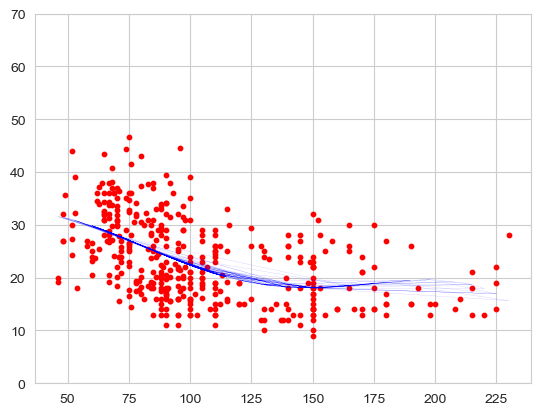

In [212]:
plt.scatter(XpolyHorse, ypolyMpg, color='red',s=10)
plt.plot(XpolyHorse, pol_reg.predict(poly_reg.fit_transform(XpolyHorse)), color='blue',linewidth=0.05)
plt.ylim([0, 70])
plt.show()

In [278]:
pol_reg.fit(Xtrain_poly,y_train)        #Linear
cutoff = 27.3                           # decide on a cutoff limit
y_pred_poly = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_poly[y_pred > cutoff] = 1
y_test_poly = np.zeros_like(y_test)
y_test_poly[y_test > cutoff] = 1
cm=confusion_matrix(y_test_poly,y_pred_poly)
ac=accuracy_score(y_test_poly,y_pred_poly)*100
pr=precision_score(y_test_poly,y_pred_poly,average='macro')*100
print("Confusion Metrics:\n",cm)
print("______________________________")
print("Accuracy Score:\n",ac,"%")
print("______________________________")
print("Precision score:\n",pr,"%")
print("______________________________")
print("R2 Score:\n",r2_score(y_test_poly, y_pred_poly))

Confusion Metrics:
 [[56 13]
 [ 8 21]]
______________________________
Accuracy Score:
 78.57142857142857 %
______________________________
Precision score:
 74.63235294117648 %
______________________________
R2 Score:
 -0.02848575712143897


In [279]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
aa =preprocessing.LabelEncoder()
sc_X = StandardScaler()
X_train_knn = sc_X.fit_transform(X_train)
X_test_knn = sc_X.transform(X_test)
cutoff = 27.3
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)

In [281]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
y_train_knn = np.zeros_like(y_train) 
y_train_knn[y_train > cutoff] = 1
y_test_knn = np.zeros_like(y_test) 
y_test_knn[y_test > cutoff] = 1
knn.fit(X_train,y_train_knn)
knn_pred=knn.predict(X_test)
knn.score(X_test,y_test_knn)
cm =confusion_matrix(y_test_knn,knn_pred)
ac=accuracy_score(y_test_knn,knn_pred)*100
pr=precision_score(y_test_knn,knn_pred,average='macro')*100
print("Confusion Metrics:\n",cm)
print("______________________________")
print("Accuracy Score:\n",ac,"%")
print("______________________________")
print("Precision score:\n",pr,"%")
print("______________________________")
print("R2 Score:\n",r2_score(y_test_knn,knn_pred))

Confusion Metrics:
 [[60  9]
 [ 6 23]]
______________________________
Accuracy Score:
 84.6938775510204 %
______________________________
Precision score:
 81.39204545454545 %
______________________________
R2 Score:
 0.2653673163418292


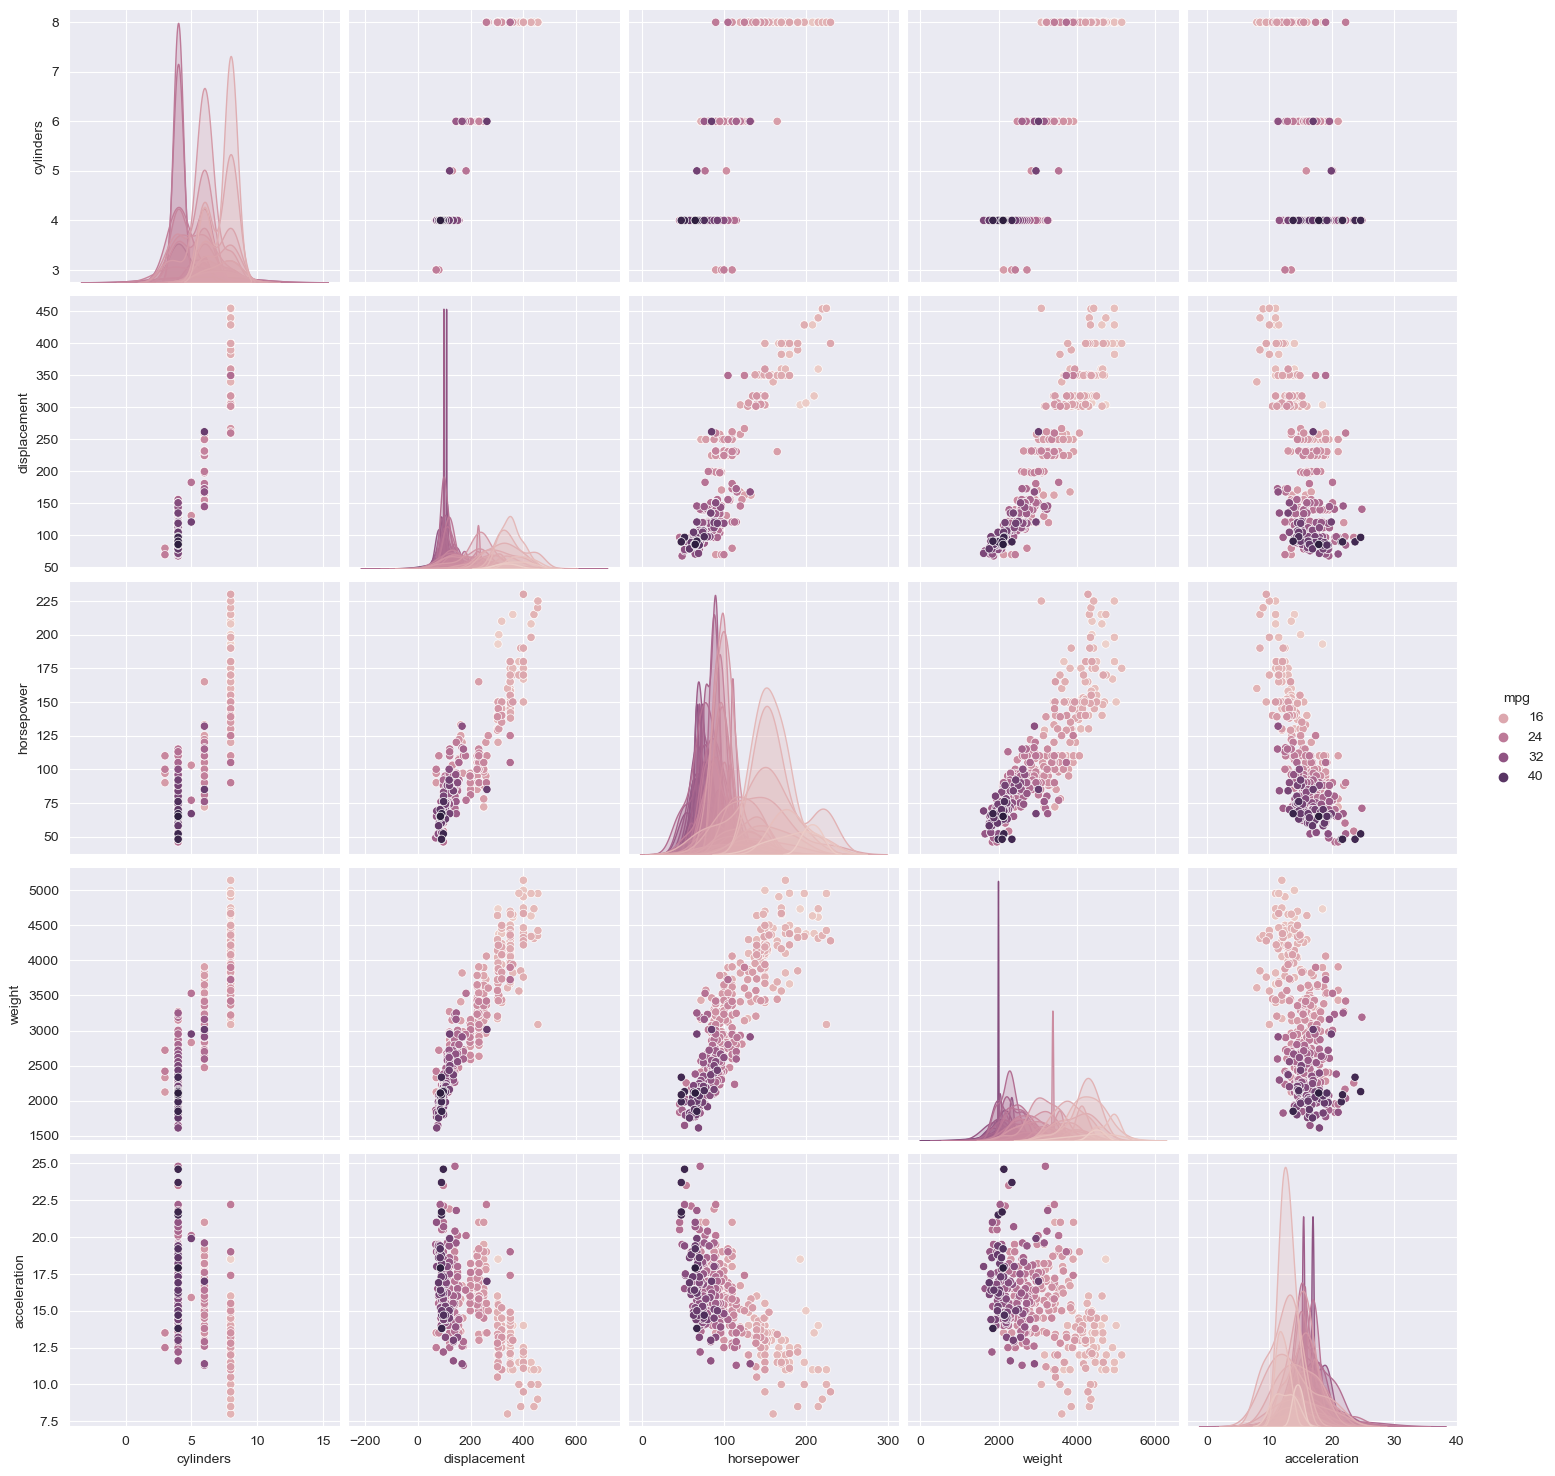

In [282]:
sns.set_style('darkgrid');
sns.pairplot(df, hue='mpg', height=3);
plt.show()

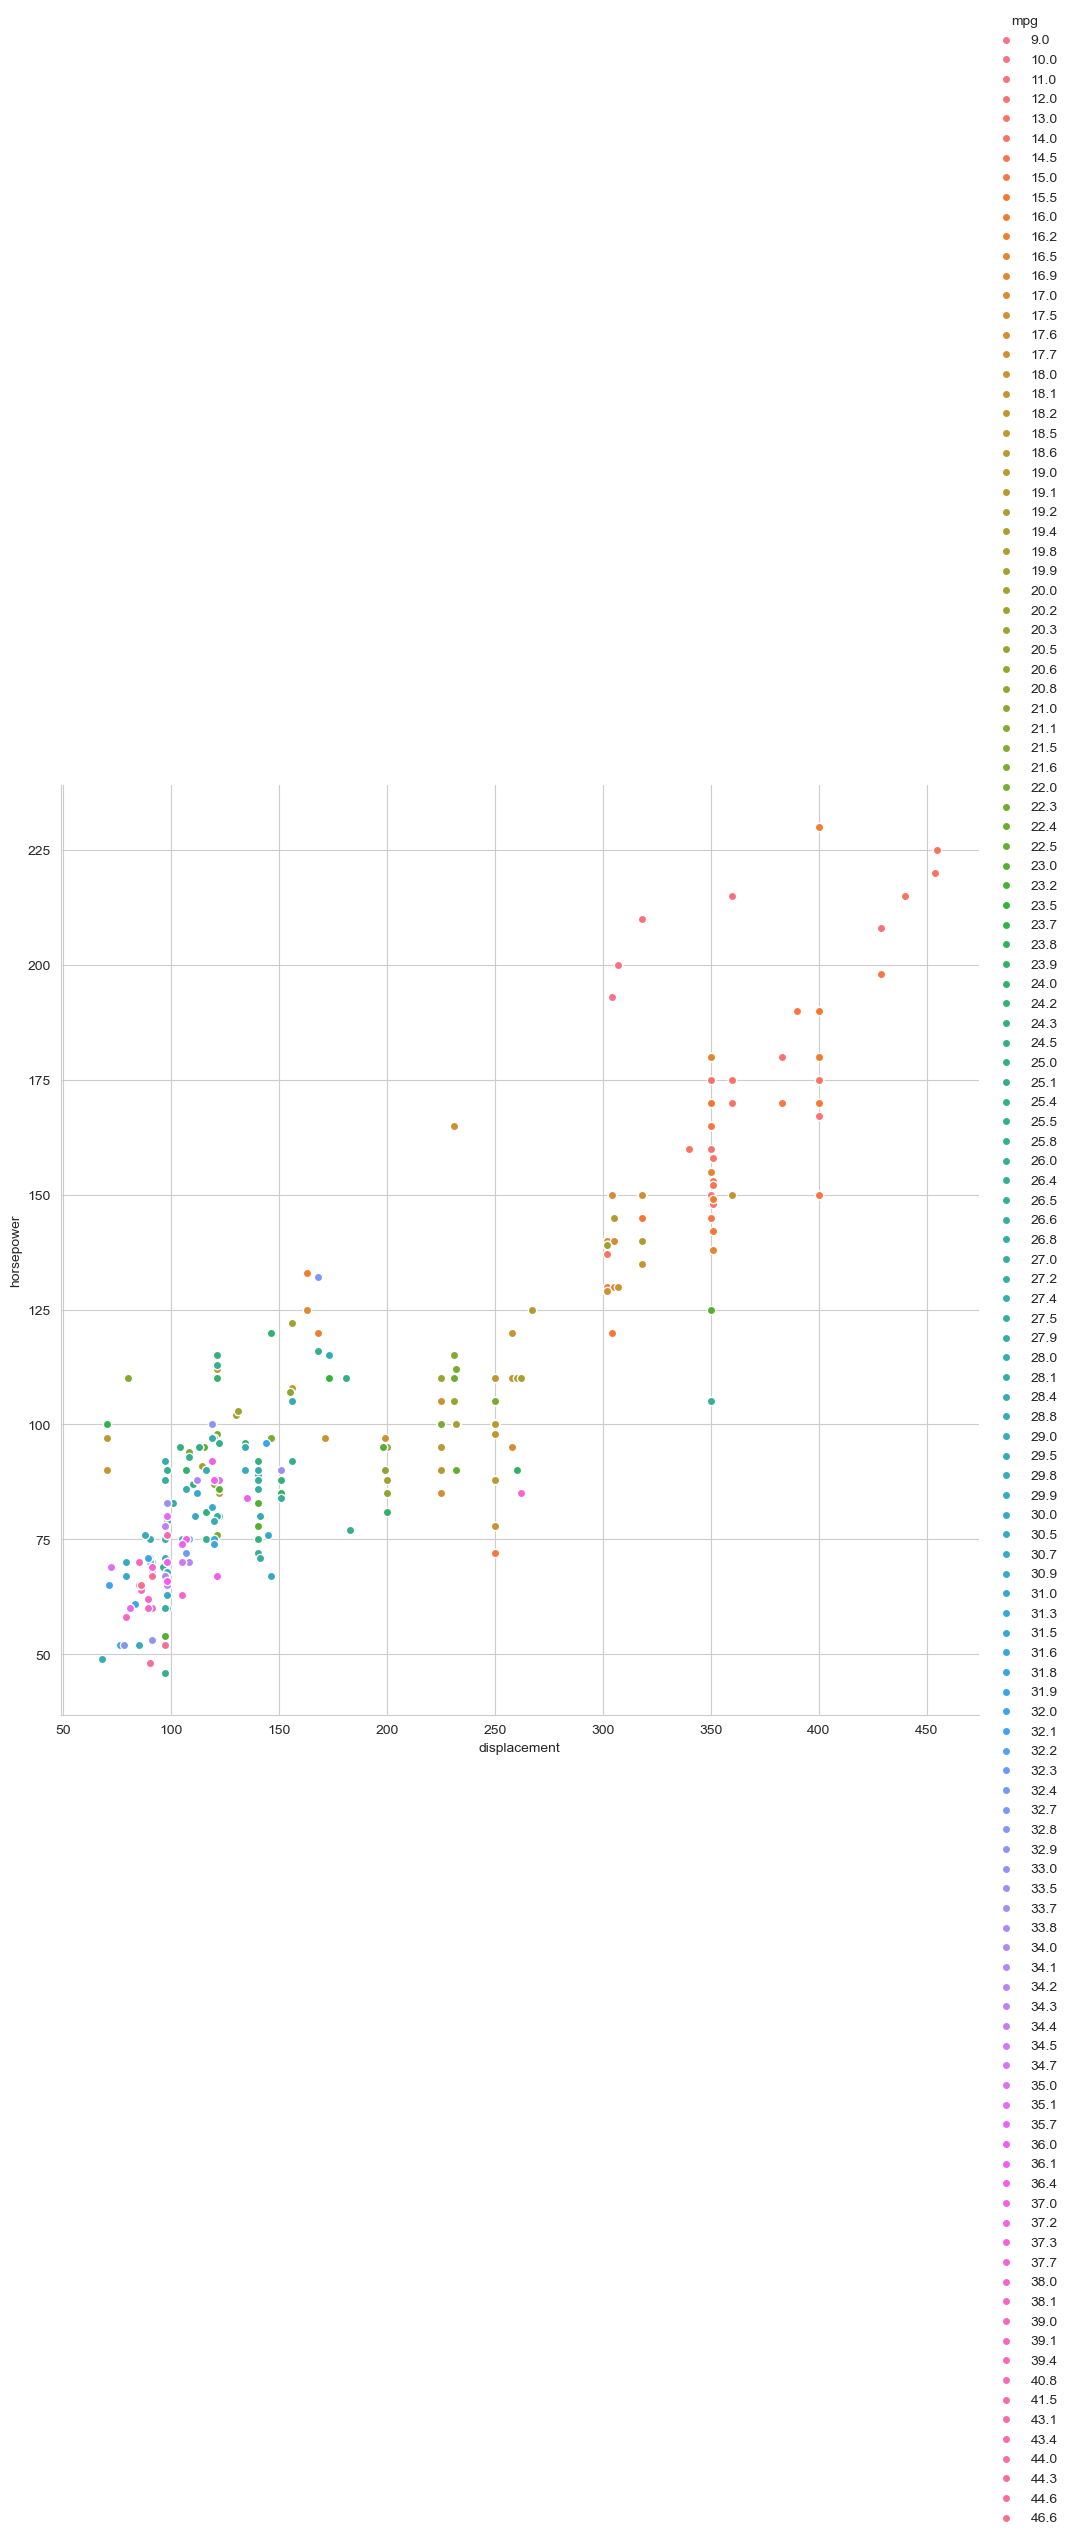

In [217]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='mpg', height=10) \
.map(plt.scatter, 'displacement','horsepower',edgecolor='w') \
.add_legend();
plt.show()

In [283]:
#Naive Bais
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
Naive = StandardScaler()
X_train_naive = Naive.fit_transform(X_train)
X_test_naive = Naive.transform(X_test)
y_test_naive = np.zeros_like(y_test)
y_test_naive[y_test > cutoff] = 1
y_train_naive = np.zeros_like(y_train)
y_train_naive[y_train > cutoff] = 1
y_train_naive =y_train_naive.reshape(294,1)
Nclassifier = GaussianNB()
Nclassifier.fit(X_train_naive, y_train_naive)
y_pred_naive = Nclassifier.predict(X_test_naive)
cm=confusion_matrix(y_test_naive, y_pred_naive)
ac=accuracy_score(y_test_naive, y_pred_naive)*100
pr=precision_score(y_test_naive, y_pred_naive,average='macro')*100
print("Confusion Matric:\n",cm)
print("______________________________")
print("Accuracy Score:\n",ac,"%")
print("______________________________")
print("Precision score:\n",pr,"%")
print("______________________________")
print("R2 Score:\n",r2_score(y_test_naive, y_pred_naive))

Confusion Matric:
 [[45 24]
 [ 3 26]]
______________________________
Accuracy Score:
 72.44897959183673 %
______________________________
Precision score:
 72.875 %
______________________________
R2 Score:
 -0.32233883058470747


C:\Users\Boncuk2\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matric:
  [[58 11]
 [ 5 24]]
______________________________
Accuracy Score :
 83.6734693877551 %
______________________________
Precision score :
 80.31746031746032 %
______________________________
R2 Score:
  0.21639180409795122


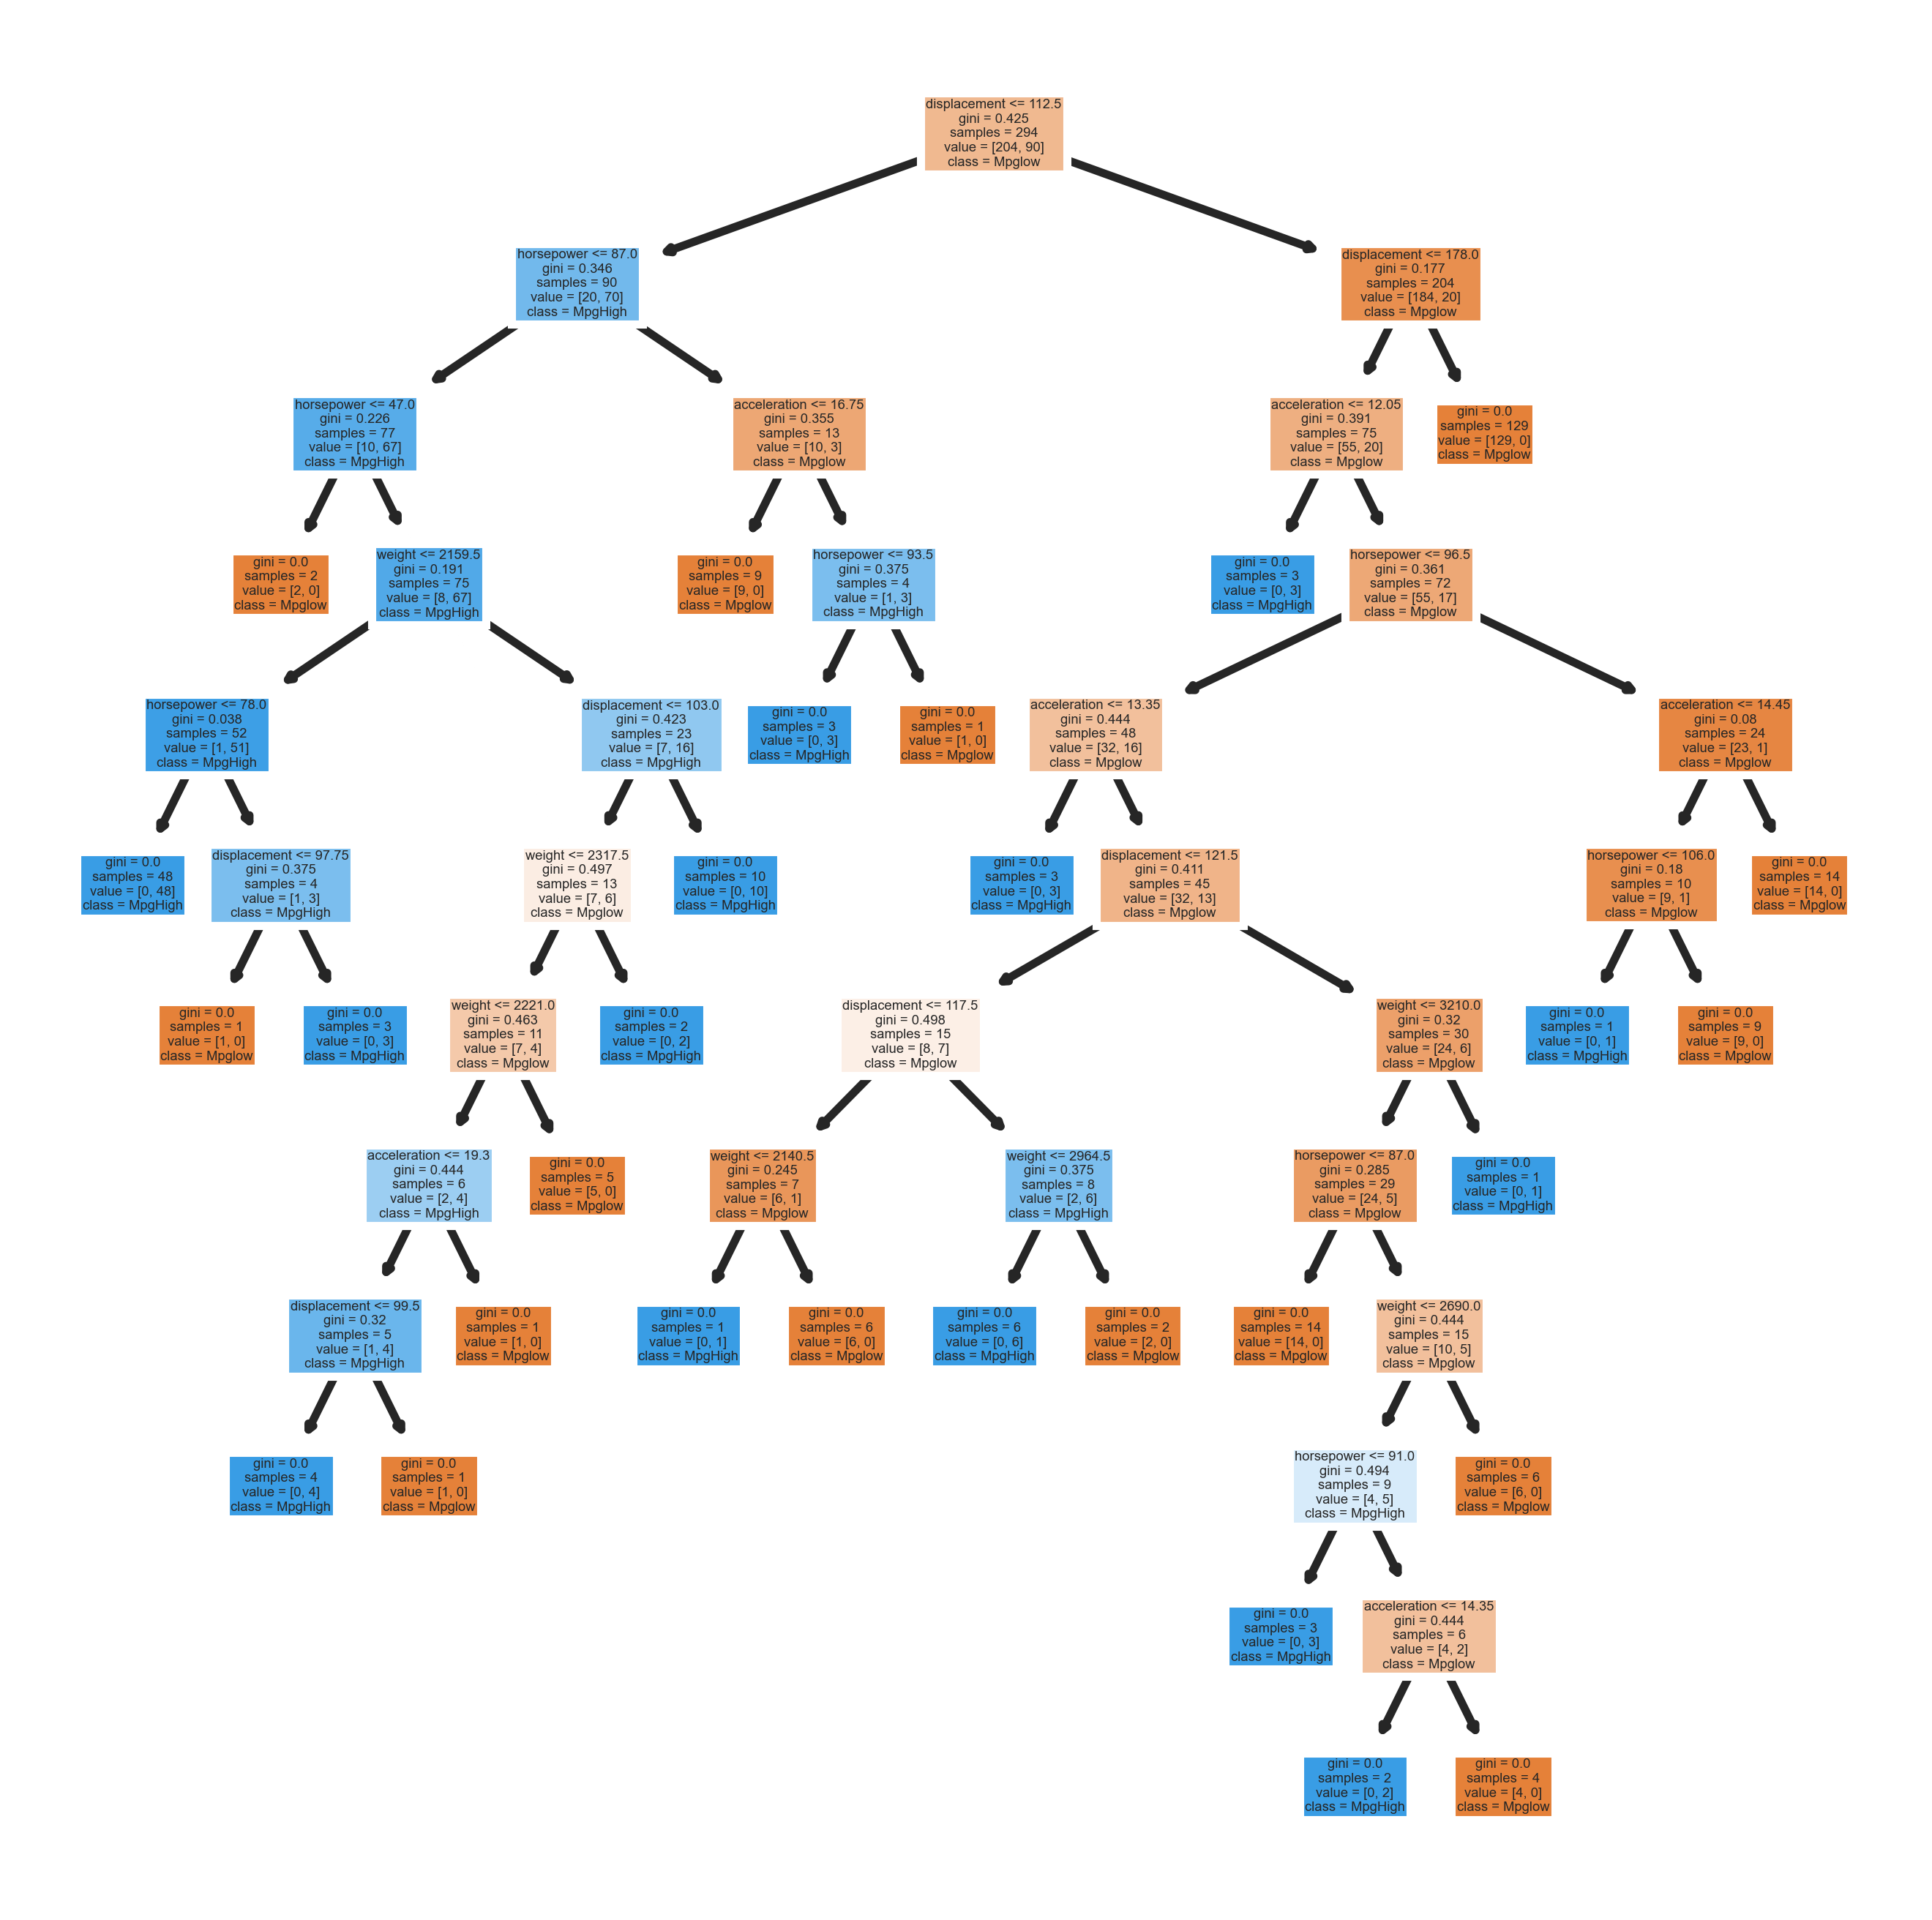

In [284]:
#Decison Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
Yname = 'Mpglow','MpgHigh'
Xname = X.columns.values.tolist()
y_train_dt = np.zeros_like(y_train)
y_train_dt[y_train > cutoff] = 1
y_test_dt = np.zeros_like(y_test)
y_test_dt[y_test > cutoff] = 1
dt.fit(X_train,y_train_dt)
y_pred_dt=dt.predict(X_test)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dt,feature_names = Xname,class_names=Yname,filled = True);
fig.savefig('imagename.png')
cm=confusion_matrix(y_test_dt,y_pred_dt)
ac=accuracy_score(y_test_dt,y_pred_dt)*100
pr=precision_score(y_test_dt,y_pred_dt,average='macro')*100
print("Confusion Matric:\n ",cm)
print("______________________________")
print("Accuracy Score :\n",ac,"%")
print("______________________________")
print("Precision score :\n",pr,"%")
print("______________________________")
print("R2 Score:\n ",r2_score(y_test_dt, y_pred_dt))
# def compute_impurity(feature, impurity_criterion):
    
#     probs = X.value_counts(normalize=True)
    
#     if impurity_criterion == 'entropy':
#         impurity = -1 * np.sum(np.log2(probs) * probs)
#     elif impurity_criterion == 'gini':
#         impurity = 1 - np.sum(np.square(probs))
#     else:
#         raise ValueError('Unknown impurity criterion')
        
#     return(round(impurity, 3))
# print('impurity using entropy:', compute_impurity( 'entropy'))
# print('impurity using gini index:', compute_impurity('gini'))""#

Confusion Matric:
 [[60  9]
 [ 6 23]]
______________________________
Accuracy Score:
 84.6938775510204 %
______________________________
Precision score:
 81.39204545454545 %
______________________________
R2 Score:
  0.2653673163418292


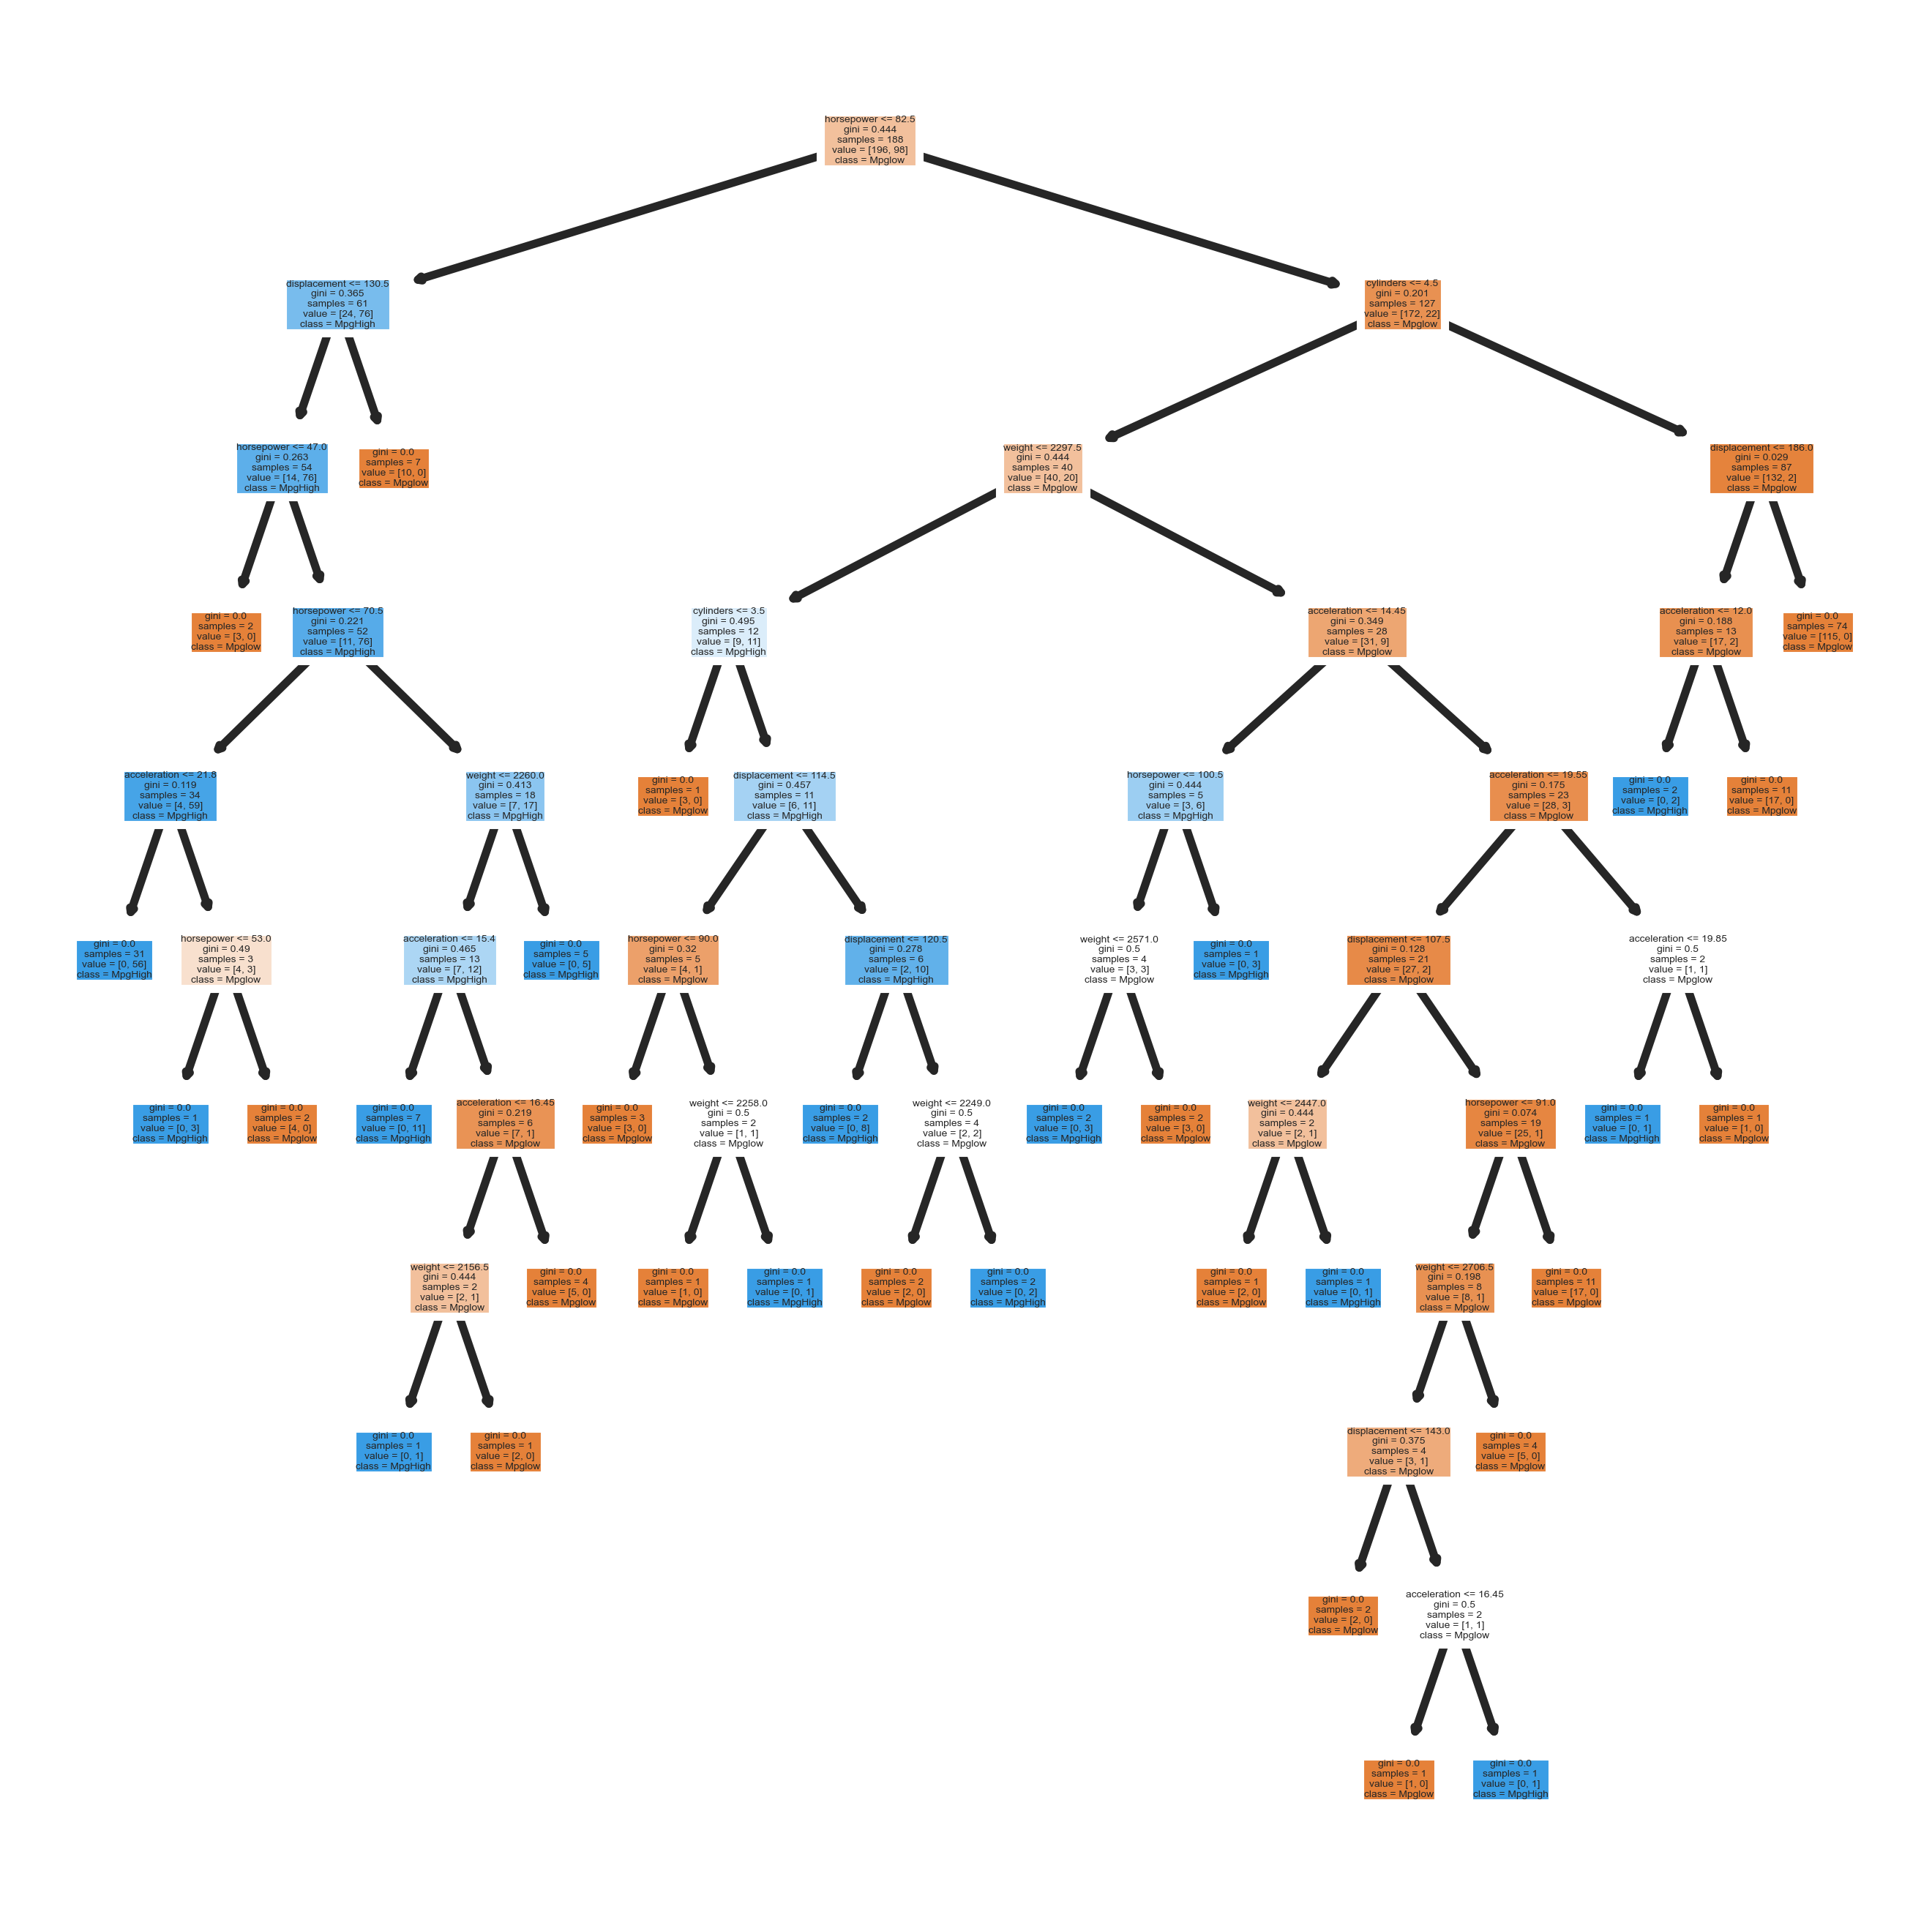

In [285]:
###### Randorm Forest ######
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
y_train_rf = np.zeros_like(y_train)
y_train_rf[y_train > cutoff] = 1
y_test_rf = np.zeros_like(y_test)
y_test_rf[y_test > cutoff] = 1
rf.fit(X_train,y_train_rf)
y_pred_rf=rf.predict(X_test)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],feature_names = Xname, class_names=Yname,filled = True);
fig.savefig('rf_individualtree.png')
cm=confusion_matrix(y_test_rf,y_pred_rf)
ac=accuracy_score(y_test_rf,y_pred_rf)*100
pr=precision_score(y_test_rf,y_pred_rf,average='macro')*100
print("Confusion Matric:\n",cm)
print("______________________________")
print("Accuracy Score:\n",ac,"%")
print("______________________________")
print("Precision score:\n",pr,"%")
print("______________________________")
print("R2 Score:\n ",r2_score(y_test_rf, y_pred_rf))

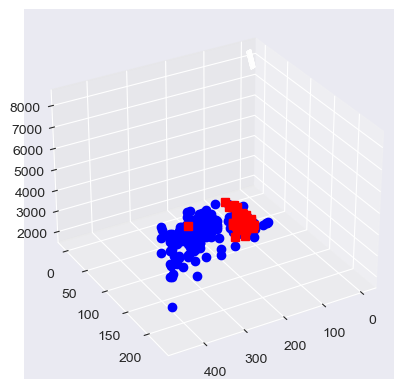

Confusion Metrics:
 [[62  7]
 [ 9 20]]
______________________________
Accuracy Score:
 83.6734693877551 %
______________________________
Precision score:
 80.69900886802294 %
______________________________
R2 Score:
 0.21639180409795122


In [286]:
#SVM
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from ipywidgets import interact, fixed
import numpy as np
import matplotlib.pyplot as plt
sv=SVC(kernel='linear',probability=True)
y_train_svc = np.zeros_like(y_train)
y_train_svc[y_train > cutoff] = 1
y_test_svc = np.zeros_like(y_test)
y_test_svc[y_test > cutoff] = 1
sv.fit(X_train,y_train_svc)
y_pred_svc=sv.predict(X_test)
r = np.exp(-(X ** 2).sum(1))
Xs=X
Xs = X.drop(['cylinders','acceleration',], axis=1)

ys=y
cutoff=27.3


ys = np.zeros_like(y)
ys[y > cutoff] = 1
#make it binary classification problem
Xs=Xs.values


Xs = Xs[np.logical_or(ys==0,ys==1)]
ys = ys[np.logical_or(ys==0,ys==1)]


model = svm.SVC(kernel='linear')
clf = model.fit(Xs, ys)
z = lambda XA,YA: (-clf.intercept_[0]-clf.coef_[0][0]*XA -clf.coef_[0][1]*YA) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
XA,YA = np.meshgrid(tmp,tmp)
fig = plt.figure()


ax = fig.add_subplot(111, projection='3d')
ax.plot3D(Xs[ys==0,0], Xs[ys==0,1], Xs[ys==0,2],'ob')
ax.plot3D(Xs[ys==1,0], Xs[ys==1,1], Xs[ys==1,2],'sr')
ax.view_init(30,60)
ax.plot_surface(XA, YA, z(XA,YA))
plt.show()
cm=confusion_matrix(y_test_svc,y_pred_svc)
ac=accuracy_score(y_test_svc,y_pred_svc)*100
pr=precision_score(y_test_svc,y_pred_svc,average='macro')*100
print("Confusion Metrics:\n",cm)
print("______________________________")
print("Accuracy Score:\n",ac,"%")
print("______________________________")
print("Precision score:\n",pr,"%")
print("______________________________")
print("R2 Score:\n",r2_score(y_test_svc, y_pred_svc))


In [222]:
from sklearn.cluster import KMeans

In [287]:
df = pd.read_csv('mpg.csv')
df = df.replace('?', np.nan)
df = df.dropna()
df = df.drop(['name','origin','model_year'], axis=1)
df.horsepower = df.horsepower.map(int)
X_cluster=df.iloc[:,[0,3]].values

In [288]:
kmeans=KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X_cluster)
print(kmeans.cluster_centers_)

[[ 26.42233677  85.00687285]
 [ 14.87029703 160.54455446]]


C:\Users\Boncuk2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


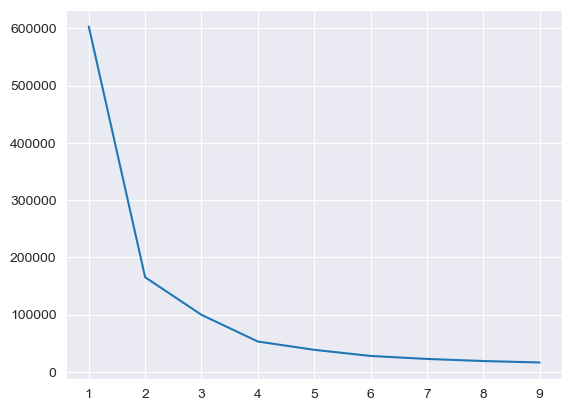

In [289]:
results=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X_cluster)
    results.append(kmeans.inertia_)
plt.plot(range(1,10),results)
plt.show()

In [290]:
kmeans= KMeans(n_clusters=2, init='k-means++',random_state=0)
y_predkm = kmeans.fit_predict(X_cluster)


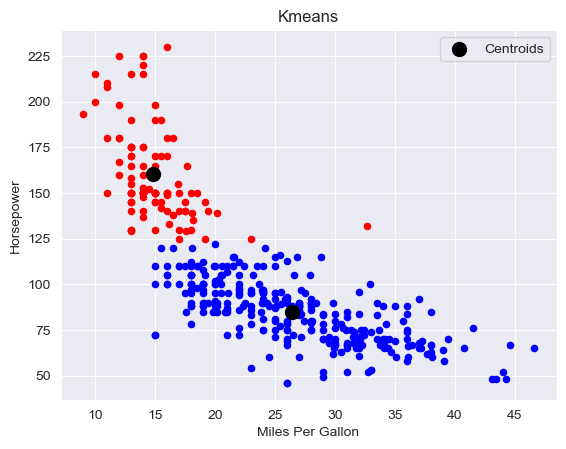

In [291]:
plt.scatter(X_cluster[y_predkm==0,0],X_cluster[y_predkm==0,1],s=20,c='red')
plt.scatter(X_cluster[y_predkm==1,0],X_cluster[y_predkm==1,1],s=20,c='blue')
#plt.scatter(X_cluster[y_predkm==2,0],X_cluster[y_predkm==2,1],s=100,c='green')
#plt.scatter(X_cluster[y_predkm==3,0],X_cluster[y_predkm==3,1],s=100,c='pink')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =100, c = 'black', label = 'Centroids')
plt.xlabel('Miles Per Gallon')
plt.ylabel('Horsepower')
plt.xticks()
plt.yticks()
plt.gca().set_xlim()
plt.gca().set_ylim()
plt.legend() 
plt.title('Kmeans')
plt.show()

In [294]:
cutoff=18
ykm = np.zeros_like(y)
ykm[y > cutoff] = 1
ac=accuracy_score(ykm,y_predkm)*100
cm=confusion_matrix(ykm,y_predkm)
pr=precision_score(ykm,y_predkm,average='macro')*100

print("Confusion Metrics:\n",cm)
print("______________________________")
print("Accuracy Score:\n",ac,"%")
print("______________________________")
print("Precision score:\n",pr,"%")
print("______________________________")
print("R2 Score:\n ",r2_score(ykm, y_predkm))

Confusion Metrics:
 [[ 92  32]
 [  9 259]]
______________________________
Accuracy Score:
 89.54081632653062 %
______________________________
Precision score:
 90.04627266850396 %
______________________________
R2 Score:
  0.5163697640828117


In [295]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_predh = hierarchical_cluster.fit_predict(X_cluster)

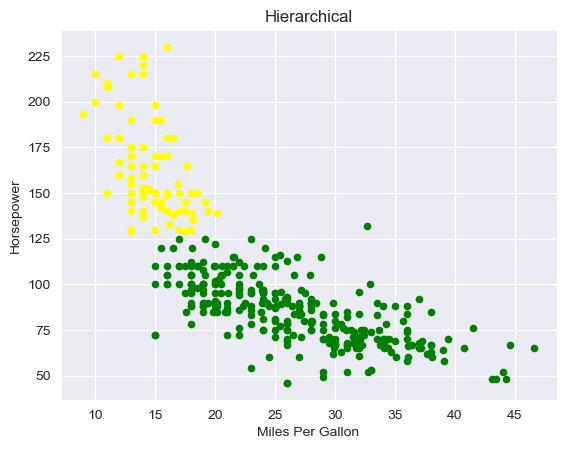

In [296]:
plt.title("Hierarchical")
plt.xlabel('Miles Per Gallon')
plt.ylabel('Horsepower')
plt.scatter(X_cluster[y_predh==0,0],X_cluster[y_predh==0,1],s=20,c='green')
plt.scatter(X_cluster[y_predh==1,0],X_cluster[y_predh==1,1],s=20,c='yellow')
plt.show()

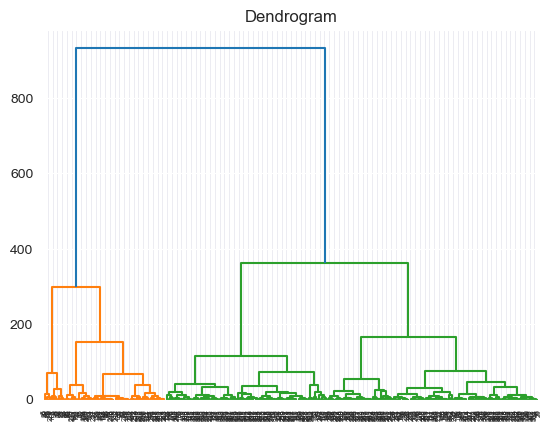

In [297]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_cluster, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [298]:
cutoff=27.8
yh = np.zeros_like(y)
yh[y > cutoff] = 1
ac=accuracy_score(yh,y_predh)*100
cm=confusion_matrix(yh,y_predh)
pr=precision_score(yh,y_predh,average='macro')*100

print("Confusion Metrics:\n",cm)
print("______________________________")
print("Accuracy Score:\n",ac,"%")
print("______________________________")
print("Precision score:\n",pr,"%")
print("______________________________")
print("R2 Score:\n",r2_score(yh, y_predh))

Confusion Metrics:
 [[178  97]
 [117   0]]
______________________________
Accuracy Score:
 45.40816326530612 %
______________________________
Precision score:
 30.16949152542373 %
______________________________
R2 Score:
 -1.6072416472416475
